In [2]:
import pandas as pd
import seaborn as sns # For plotting
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [3]:
df_charity_navigator = pd.read_csv('/Users/Mariane/Documents/Giving/charity_data.csv')

In [9]:
df_charity_navigator.head()

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
0,100.0,Environment,Working with Oregonians to enhance our quality...,93-0642086,917313.0,0.101,0.18,0.184,0.714,88.61,...,Great communities. Working lands. Iconic Places.,1000 Friends of Oregon,1022513.0,91.94,OR,Environmental Protection and Conservation,small,6.549615e+05,168785.592,92648.613
1,89.0,"Arts, Culture, Humanities",Serving the metropolitan Baltimore area and th...,31-1770828,5053059.0,0.231,0.05,0.032,0.735,82.85,...,88.1 FM -. Your NPR News Station,WYPR,5685761.0,85.59,MD,Public Broadcasting and Media,mid,3.713998e+06,161697.888,1167256.629
2,70.0,Religion,VSS Catholic Communications is dedicated to an...,91-1857425,1891500.0,0.114,0.17,0.197,0.687,86.74,...,Spirit Catholic Radio Network,VSS Catholic Communications,2140836.0,76.80,NE,Religious Media and Broadcasting,small,1.299460e+06,372625.500,215631.000
3,93.0,"Arts, Culture, Humanities",The mission of the Utah Symphony & Opera is to...,51-0145980,22506582.0,0.092,0.08,0.054,0.852,91.03,...,"Engaging, educating, and enriching lives",Utah Symphony & Opera,22203175.0,91.95,UT,Performing Arts,big,1.917561e+07,1215355.428,2070605.544
4,100.0,Human Services,"Funded solely by the footwear industry, Two Te...",22-2579809,5594243.0,0.126,0.12,0.122,0.750,86.23,...,Shoepeople Helping Shoepeople,Two Ten Footwear Foundation,6935506.0,90.26,MA,Social Services,mid,4.195682e+06,682497.646,704874.618


# General Data Exploration

In [8]:
df_charity_navigator.dtypes

ascore           float64
category          object
description       object
ein               object
tot_exp          float64
admin_exp_p      float64
fund_eff         float64
fund_exp_p       float64
program_exp_p    float64
fscore           float64
leader            object
leader_comp      float64
leader_comp_p    float64
motto             object
name              object
tot_rev          float64
score            float64
state             object
subcategory       object
size              object
program_exp      float64
fund_exp         float64
admin_exp        float64
dtype: object

In [14]:
df_charity_navigator.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ascore,8408.0,9.072490e+01,9.771194e+00,28.000,8.900000e+01,9.300000e+01,9.700000e+01,1.000000e+02
tot_exp,8408.0,1.448428e+07,6.943732e+07,53213.000,1.942998e+06,3.656226e+06,8.859808e+06,3.142984e+09
admin_exp_p,8408.0,1.057549e-01,6.338214e-02,0.001,6.300000e-02,9.500000e-02,1.350000e-01,7.420000e-01
fund_eff,8408.0,1.081101e-01,8.798233e-02,0.010,5.000000e-02,9.000000e-02,1.400000e-01,1.430000e+00
fund_exp_p,8408.0,8.773608e-02,6.488215e-02,0.001,4.500000e-02,7.700000e-02,1.150000e-01,9.160000e-01
program_exp_p,8408.0,8.050062e-01,9.413089e-02,0.047,7.570000e-01,8.140000e-01,8.650000e-01,9.970000e-01
fscore,8408.0,8.594618e+01,9.755404e+00,0.000,8.113000e+01,8.746000e+01,9.250000e+01,1.000000e+02
leader_comp,7972.0,1.641593e+05,1.453191e+05,0.000,8.997500e+04,1.316330e+05,1.977480e+05,3.691019e+06
leader_comp_p,7972.0,3.907003e-02,3.474296e-02,0.000,1.500000e-02,3.155000e-02,5.390000e-02,5.323000e-01
tot_rev,8408.0,1.582723e+07,7.557658e+07,-2049209.000,2.022281e+06,3.951672e+06,9.785276e+06,3.608002e+09


In [20]:
df_charity_navigator[['description', 'category', 'motto', 'name', 'subcategory']] \
    .describe(include=object) \
        .transpose()



,count,unique,top,freq
description,8408,8390,Vision,4
category,8408,11,Human Services,2379
motto,8395,7692,Live United,155
name,8408,8405,United Way of Forsyth County,2
subcategory,8408,37,Social Services,675


# Data Analytics of Scores and Finances

## Boxplot for Accountability Score

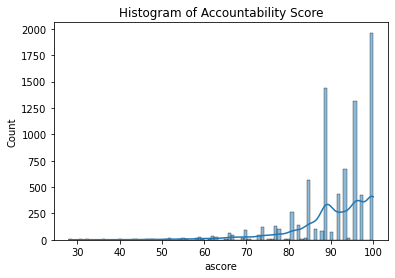

90.7249048525214

In [12]:
sns.histplot(df_charity_navigator["ascore"], kde = True).set_title("Histogram of Accountability Score")
plt.show()

df_charity_navigator['ascore'].mean()

## Boxplot of Financial Score

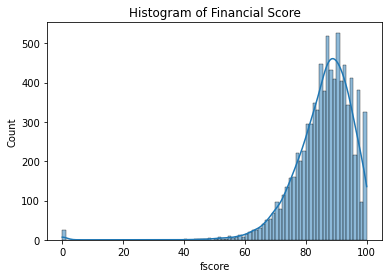

85.946183396765

In [22]:
sns.histplot(df_charity_navigator["fscore"], kde = True).set_title("Histogram of Financial Score")
plt.show()

df_charity_navigator['fscore'].mean()

## Boxplots Scores by Categories

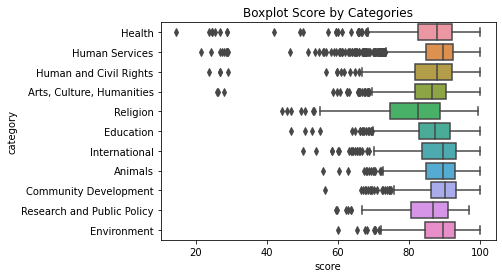

In [30]:
sns.boxplot(x = df_charity_navigator["score"], y = df_charity_navigator["category"]).set_title("Boxplot Score by Categories")
plt.show()

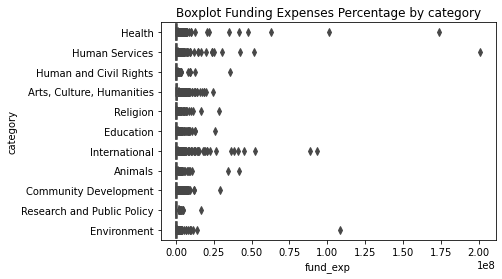

In [32]:
sns.boxplot(x = df_charity_navigator["fund_exp"], y = df_charity_navigator["category"]).set_title("Boxplot Funding Expenses Percentage by category")
plt.show()


## Boxplot Funding Efficiency in $ by category

This shows how much money is spend to raise 1 $ on average in the different categories of the charities

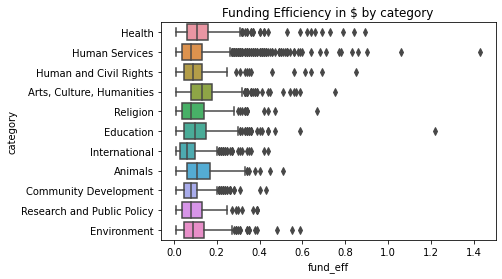

In [33]:
sns.boxplot(x = df_charity_navigator["fund_eff"], y = df_charity_navigator["category"]).set_title("Funding Efficiency in $ by category")
plt.show()

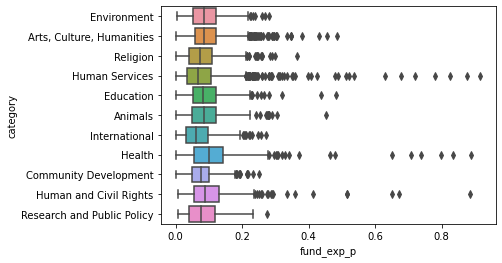

In [6]:
sns.boxplot(x = df_charity_navigator["fund_exp_p"], y = df_charity_navigator["category"])
plt.show()

## Sort Charities by lowest score

In [27]:
df_charity_navigator.sort_values(by=['score', 'category'], ascending=[True, False], inplace=True)
df_charity_navigator[['score', 'category', 'name', 'fund_eff']].head(100)

,score,category,name,fund_eff
4333,14.48,Health,Wishing Well Foundation USA,0.84
6751,21.56,Human Services,Disabled Police and Sheriff's Foundation,0.90
6081,23.84,Human and Civil Rights,The Circle of Friends for American Veterans,0.69
4520,23.84,Health,Autism Spectrum Disorder Foundation,0.79
848,24.35,Human Services,Law Enforcement Education Program,0.83
...,...,...,...,...
7688,61.24,Health,Global Solutions for Infectious Diseases,0.07
3163,61.26,Human Services,Sephardic Food Fund,0.01
6625,61.48,Religion,Camp Highland,0.03
6368,61.71,Human and Civil Rights,Center of Concern,0.31


## Boxplot Funding Efficiency by Accountability Score Groups

To further investigate the relation between score and funding efficiency the dataset was splitted into groups.

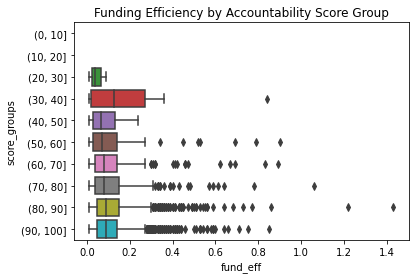

In [13]:

df_charity_navigator["score_groups"] = pd.cut(df_charity_navigator["ascore"], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
sns.boxplot(x = df_charity_navigator["fund_eff"], y = df_charity_navigator["score_groups"]).set_title("Funding Efficiency by Accountability Score Group")
plt.show()


## Boxplot of Total Revenue

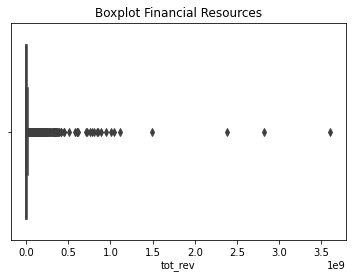

In [11]:
sns.boxplot(x = df_charity_navigator['tot_rev']).set_title("Boxplot Financial Resources")
plt.show()

## 10 Charities with highest Revenue

In [5]:
df_charity_navigator.nlargest(10, 'tot_rev')

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
4777,100.0,Human Services,Since its founding in 1881 by visionary leader...,53-0196605,3.142984e+09,0.040,0.19,0.064,0.894,84.04,...,Helping prevent and alleviate human suffering ...,American Red Cross,3.608002e+09,88.71,DC,Multipurpose Human Service Organizations,big,2.809828e+09,2.011510e+08,1.257194e+08
7408,97.0,Human Services,Feeding America is the nationwide network of 2...,36-3673599,2.826138e+09,0.003,0.01,0.009,0.986,92.50,...,Connecting people with food and ending hunger ...,Feeding America,2.827633e+09,94.28,IL,Multipurpose Human Service Organizations,big,2.786572e+09,2.543524e+07,8.478415e+06
4746,97.0,International,Americares saves lives and improves health for...,06-1008595,1.927304e+09,0.003,0.01,0.008,0.987,100.00,...,Health is on the Way.,Americares,2.380434e+09,97.87,CT,Humanitarian Relief Supplies,big,1.902249e+09,1.541843e+07,5.781912e+06
6846,93.0,Health,"Founded in 1947, Dana-Farber Cancer Institute ...",04-2263040,1.528239e+09,0.103,0.06,0.023,0.873,92.50,...,Discover. Care. Believe.,Dana-Farber Cancer Institute,1.495111e+09,92.74,MA,Medical Research,big,1.334153e+09,3.514950e+07,1.574086e+08
6752,100.0,International,"Direct Relief is a humanitarian organization, ...",95-1831116,1.008908e+09,0.003,0.01,0.001,0.994,100.00,...,Deliver a world of good,Direct Relief,1.114257e+09,100.00,CA,Humanitarian Relief Supplies,big,1.002854e+09,1.008908e+06,3.026724e+06
4232,100.0,International,World Vision is a Christian humanitarian organ...,95-1922279,9.997027e+08,0.058,0.09,0.093,0.848,80.42,...,Building a better world for children,World Vision,1.038784e+09,86.15,WA,Development and Relief Services,big,8.477479e+08,9.297235e+07,5.798276e+07
1681,97.0,Environment,The Nature Conservancy is a leading conservati...,53-0242652,8.294883e+08,0.184,0.14,0.131,0.684,77.66,...,Protecting nature. Preserving life.,The Nature Conservancy,1.006242e+09,84.06,VA,Environmental Protection and Conservation,big,5.673700e+08,1.086630e+08,1.526259e+08
7267,97.0,International,Food For The Poor (FFP) ministers to spiritual...,59-2174510,9.493774e+08,0.008,0.03,0.038,0.953,81.93,...,Serving the poorest of the poor,Food For The Poor,9.476799e+08,87.04,FL,Humanitarian Relief Supplies,big,9.047566e+08,3.607634e+07,7.595019e+06
5847,100.0,International,Compassion International's holistic child deve...,36-2423707,8.617333e+08,0.080,0.10,0.103,0.815,78.46,...,Releasing children from poverty in Jesus' name,Compassion International,8.902997e+08,84.76,CO,Development and Relief Services,big,7.023127e+08,8.875853e+07,6.893867e+07
4811,96.0,Health,The American Heart Association is the nation's...,13-5613797,8.270598e+08,0.071,0.15,0.122,0.805,83.62,...,Live a Long and Healthy Life,American Heart Association,8.518067e+08,88.07,TX,"Diseases, Disorders, and Disciplines",big,6.657832e+08,1.009013e+08,5.872125e+07


# Text Analysis of Charities
Show 20 most used words in description

In [25]:
def my_tokenizer(text):
    return text.split() if text != None else []
tokens = df_charity_navigator.description.map(my_tokenizer).sum()
counter = Counter(tokens)
counter.most_common(20)


[('and', 44331),
 ('the', 32562),
 ('to', 25238),
 ('of', 24719),
 ('in', 17367),
 ('a', 12258),
 ('is', 9568),
 ('for', 9329),
 ('The', 6602),
 ('with', 5674),
 ('that', 5164),
 ('by', 4615),
 ('our', 4544),
 ('their', 3842),
 ('as', 3339),
 ('We', 3287),
 ('through', 3267),
 ('are', 3213),
 ('community', 2985),
 ('on', 2810)]

Remove most used words

In [30]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOP_WORDS]

counter = Counter(remove_stopwords(tokens))
counter.most_common(20)

[('The', 6602),
 ('We', 3287),
 ('community', 2985),
 ('people', 2801),
 ('mission', 2711),
 ('programs', 2529),
 ('children', 2327),
 ('Our', 1913),
 ('families', 1804),
 ('provide', 1788),
 ('Founded', 1691),
 ('support', 1641),
 ('services', 1598),
 ('organization', 1527),
 ('education', 1465),
 ('public', 1416),
 ('providing', 1384),
 ('help', 1375),
 ('provides', 1363),
 ('Foundation', 1338)]

<AxesSubplot:xlabel='token'>

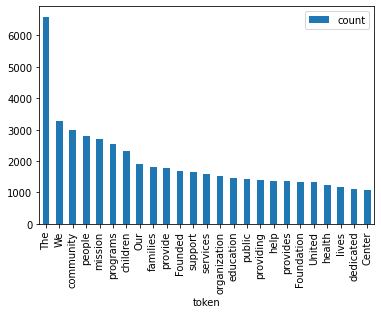

In [31]:
freq_df = pd.DataFrame.from_records(counter.most_common(25), columns = ['token', 'count'])
freq_df.plot(kind='bar', x='token')

From this analysis you can see that the charities mostly support People, Famalies, education and health